<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/tensorflow_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the sample data from integers to floating-point numbers:

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Build a machine learning model

Build a `tf.keras.Sequential` model by stacking layers.

In [ ]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dropout(0.2),
                                  tf.keras.layers.Dense(10)
                                  ])

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.6974121 , -0.36517075, -0.3870688 , -0.39008838, -0.94471836,
         0.19528264, -0.16462645, -0.24518228,  0.23193407, -0.5775624 ]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class: 

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.22032768, 0.0761369 , 0.07448778, 0.07426319, 0.04264822,
        0.13335122, 0.09304445, 0.08584312, 0.1383294 , 0.06156795]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`, which takes a vector of logits and a `True` index and returns a scalar loss for each example.

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.0147688

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2990 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1437 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0746 - accuracy: 0.9764


The `Model.evaluate` method checks the models performance, usually on a "[Validation-set](https://developers.google.com/machine-learning/glossary#validation-set)" or "[Test-set](https://developers.google.com/machine-learning/glossary#test-set)".

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0722 - accuracy: 0.9770 - 915ms/epoch - 3ms/step


[0.07217366993427277, 0.9769999980926514]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [ ]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.13344826e-08, 1.46894976e-08, 4.00593490e-06, 1.11402376e-04,
        5.42701335e-11, 8.28257853e-08, 1.02941493e-13, 9.99883413e-01,
        5.90457638e-08, 8.71401141e-07],
       [1.02629405e-09, 2.17793728e-04, 9.99622226e-01, 1.59479474e-04,
        1.46093248e-13, 1.37195997e-07, 4.21746726e-09, 3.77496125e-11,
        3.78514187e-07, 3.75910848e-12],
       [2.82150631e-06, 9.99144435e-01, 1.88001341e-05, 9.68581662e-06,
        3.36178746e-05, 1.89619914e-05, 1.20035238e-05, 6.92391419e-04,
        6.04949782e-05, 6.77537128e-06],
       [9.94235218e-01, 2.94557512e-09, 1.77085109e-04, 2.22035055e-06,
        1.53728452e-05, 2.05501183e-05, 1.32452144e-04, 5.36593935e-03,
        3.53493647e-07, 5.07270743e-05],
       [4.51573158e-07, 4.71162753e-09, 4.49220443e-06, 1.96789802e-08,
        9.97786641e-01, 1.10824305e-06, 1.78405069e-04, 3.33633870e-05,
        5.06823881e-07, 1.99495070e-03]], dtype=float32)>

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


## basic tensorflow


In [8]:
import tensorflow as tf
import numpy
import pandas as pd

In [17]:
a=tf.ones([2,3])
print(a)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [19]:
a=tf.Variable(a)
a[0,0].assign(10)
b=a.read_value()
print(b)

tf.Tensor(
[[10.  1.  1.]
 [ 1.  1.  1.]], shape=(2, 3), dtype=float32)


In [10]:
#add multiply div

a=tf.constant(2)
b=tf.constant(3)

print('a+b:', a.numpy() + b.numpy())
print('Addition with constants:', a+b)
print('Addition with constants:', tf.add(a,b))
print('a*b:', a.numpy()*b.numpy())
print('Multiplication with constants:', a*b)
print('Multiplication with constants: ', tf.multiply(a,b))

a+b: 5
Addition with constants: tf.Tensor(5, shape=(), dtype=int32)
Addition with constants: tf.Tensor(5, shape=(), dtype=int32)
a*b: 6
Multiplication with constants: tf.Tensor(6, shape=(), dtype=int32)
Multiplication with constants:  tf.Tensor(6, shape=(), dtype=int32)


In [11]:
import numpy as np

In [12]:
tensor_1d=np.array([1.45,-1,0.2,102.1])

In [13]:
print(tensor_1d)

[  1.45  -1.     0.2  102.1 ]


In [14]:
print(tensor_1d[0])

1.45


In [15]:
print(tensor_1d.ndim)

1


In [16]:
print(tensor_1d.shape)

(4,)


In [23]:
matrix1=tf.constant([[3.,3.]])

In [24]:
matrix2=([[2.],[2.]])

In [26]:
product=tf.matmul(matrix1, matrix2)
print(product)

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)


In [27]:
print(matrix1* matrix2)

tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32)


In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np

TensorFlow 1.x selected.


In [2]:
#Setting the Random seeds for numpy and TF

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
# Making and Setting Data

In [5]:
rand_a=np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [6]:
rand_b=np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [7]:
# place holder

In [8]:
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)

In [9]:
# operations

In [10]:
add_op=a+b
mul_op=a*b

### Running Sessions to Create Graphs with feed dictionaries

In [14]:
with tf.Session() as sess:
  add_result=sess.run(add_op,feed_dict={a: rand_a, b: rand_b})
  print(add_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


In [15]:
with tf.Session() as sess:
  mul_result=sess.run(mul_op, feed_dict={a: rand_a, b: rand_b})
  print(mul_result)

[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Example Neural Network

In [16]:
n_features=10
n_dense_neuron= 3

In [17]:
x=tf.placeholder(tf.float32, shape=(None, n_features)) #by giving none in shape it gives freedom to use any number of samples

In [18]:
#Bias and Weight
w=tf.Variable(initial_value=tf.random_normal([n_features, n_dense_neuron])) # initaial_value=........random.normal(mean,SD)
#We use dimensions as per Transpose 

b=tf.Variable(tf.zeros(n_dense_neuron))

In [45]:
w

<tf.Variable 'Variable:0' shape=(10, 3) dtype=float32_ref>

#### Operation Activation Function

In [19]:
xW=tf.matmul(x, w)

In [20]:
z=tf.add(xW, b)

Other Squashing functions are also present  
* **Rectilinear**        - tf . nn . relu 
* **Hyperbolic Tangent** - tf . tanh

In [21]:
a=tf.sigmoid(z)

In [22]:
#Variable Initializer
init=tf.global_variables_initializer()

In [24]:
with tf.Session() as sess:
  sess.run(init)

  layer_out= sess.run(a, feed_dict={x: np.random.random(size=[1, n_features])})

In [25]:
print (layer_out)

[[0.08226703 0.66272306 0.17261438]]


## Basic Regression Example

To solve the equation

y = mx + b

y will be the y_labels and x is the x_data. The aim to figure out the slope and the intercept for the line that best fits our data!

In [26]:
### Making Data

In [27]:
x_data = np.linspace(1, 10, 10) + np.random.uniform(-1.5, 1.5, size = (10))
x_data

array([-0.20856056,  0.80854248,  3.60452189,  5.17143961,  3.9786809 ,
        5.32671763,  7.51747459,  6.99290937,  9.60411341,  9.96290567])

In [28]:
y_label = np.linspace(1, 10, 10) + np.random.uniform(-1.5, 1.5, size = (10))
y_label

array([1.5420333 , 2.06464458, 1.63019008, 3.17180981, 5.22561526,
       4.86130098, 7.00035014, 6.9140287 , 7.6584252 , 9.03483077])

In [29]:
import matplotlib.pyplot as plt

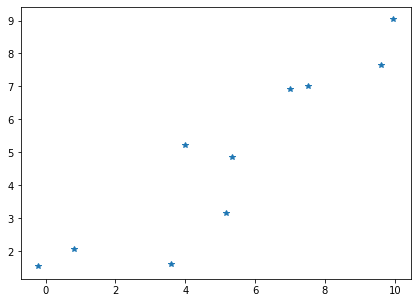

In [30]:
plt.figure(figsize= (7,5))
plt.plot(x_data, y_label, '*',)

In [33]:
#randomising m and b
np.random.random(3)

array([0.94926413, 0.47816742, 0.46111934])

In [32]:
m = tf.Variable(initial_value= 0.81)
b = tf.Variable(initial_value= 0.67)

### Cost Function

In [34]:
error=0
for x,y in zip(x_data,y_label):

  y_pred=m*x+b

  error=error+ ((y-y_pred)**2)

In [35]:
### Optimizer

In [36]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [37]:
#### Inititalizing Globals

In [38]:
init = tf.global_variables_initializer()

In [39]:
### Session and Run

In [40]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        
    final_slope, final_bias = sess.run([m, b])

In [41]:
final_slope

0.76458085

In [42]:
final_bias

0.8189562

In [43]:
### Evaluating Results

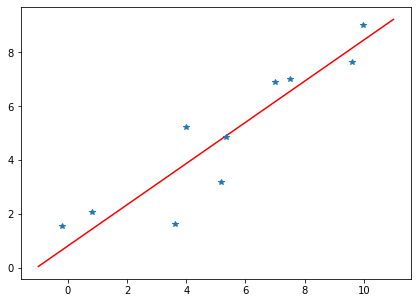

In [44]:
plt.figure(figsize= (7,5))

x_test = np.linspace(-1,11,10)

y_pred_plot = (final_slope * x_test) + final_bias

plt.plot(x_test, y_pred_plot, 'r')
plt.plot(x_data, y_label, '*',)

# Sequential model

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## When to use a Sequential model

A `Sequential` model is appropriate for **a plain stack of layers**
where each layer has **exactly one input tensor and one output tensor**.

Schematically, the following `Sequential` model:

In [3]:
model= keras.Sequential(
    [
     layers.Dense(2, activation='relu', name='layer1'),
     layers.Dense(3, activation='relu', name='layer2'),
     layers.Dense(4, activation='relu', name='layer3')
    ]
)

#call model on a test input
x=tf.ones((3,3))
y=model(x)
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.02011532, 0.4383386 , 0.67539907, 0.        ],
       [0.02011532, 0.4383386 , 0.67539907, 0.        ],
       [0.02011532, 0.4383386 , 0.67539907, 0.        ]], dtype=float32)>

In [4]:
x

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

is equivalent to this function:

In [10]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))
y

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[-0.00031513,  0.00130189, -0.00042323,  0.00056201],
       [-0.00031513,  0.00130189, -0.00042323,  0.00056201],
       [-0.00031513,  0.00130189, -0.00042323,  0.00056201]],
      dtype=float32)>

A Sequential model is **not appropriate** when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch
model)

## Creating a Sequential model

You can create a Sequential model by passing a list of layers to the Sequential
constructor:

In [11]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

Its layers are accessible via the `layers` attribute:

In [12]:
model.layers

You can also create a Sequential model incrementally via the `add()` method:

In [13]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

Note that there's also a corresponding `pop()` method to remove layers:
a Sequential model behaves very much like a list of layers.

In [14]:
model.pop()
print(len(model.layers))  # 2

2


Also note that the Sequential constructor accepts a `name` argument, just like
any layer or model in Keras. This is useful to annotate TensorBoard graphs
with semantically meaningful names.

In [15]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

## Specifying the input shape in advance

Generally, all layers in Keras need to know the shape of their inputs
in order to be able to create their weights. So when you create a layer like
this, initially, it has no weights:

In [16]:
layer = layers.Dense(3)
layer.weights  # Empty

[]

It creates its weights the first time it is called on an input, since the shape
of the weights depends on the shape of the inputs:

In [17]:
# Call layer on a test input
x = tf.ones((1, 4))
y = layer(x)
layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<tf.Variable 'dense_6/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.03804946, -0.6549634 ,  0.38843262],
        [ 0.17836809,  0.26195657, -0.7727464 ],
        [-0.32167977,  0.89308834,  0.76637316],
        [ 0.9142319 , -0.682855  , -0.24594128]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

Naturally, this also applies to Sequential models. When you instantiate a
Sequential model without an input shape, it isn't "built": it has no weights
(and calling
`model.weights` results in an error stating just this). The weights are created
when the model first sees some input data:

In [18]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

# At this point, you can't do this:
# model.weights

# You also can't do this:
# model.summary()

# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Number of weights after calling the model: 6


Once a model is "built", you can call its `summary()` method to display its
contents:

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (1, 2)                    10        
                                                                 
 dense_8 (Dense)             (1, 3)                    9         
                                                                 
 dense_9 (Dense)             (1, 4)                    16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


However, it can be very useful when building a Sequential model incrementally
to be able to display the summary of the model so far, including the current
output shape. In this case, you should start your model by passing an `Input`
object to your model, so that it knows its input shape from the start:

In [20]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Note that the `Input` object is not displayed as part of `model.layers`, since
it isn't a layer:

In [21]:
model.layers

A simple alternative is to just pass an `input_shape` argument to your first
layer:

In [22]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2)                 10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


Models built with a predefined input shape like this always have weights (even
before seeing any data) and always have a defined output shape.

In general, it's a recommended best practice to always specify the input shape
of a Sequential model in advance if you know what it is.

## A common debugging workflow: `add()` + `summary()`

When building a new Sequential architecture, it's useful to incrementally stack
layers with `add()` and frequently print model summaries. For instance, this
enables you to monitor how a stack of `Conv2D` and `MaxPooling2D` layers is
downsampling image feature maps: